<a href="https://colab.research.google.com/github/PandawanGo/Cha.1.AluraStore/blob/main/Cha.1.AluraStoreBr_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importação dos dados



In [ ]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

loja["loja"] = "Loja 1"
loja2["loja"] = "Loja 2"
loja3["loja"] = "Loja 3"
loja4["loja"] = "Loja 4"

df_lojas = pd.concat([loja, loja2, loja3, loja4], ignore_index=True)


df_lojas.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon,loja
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79,Loja 1
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66,Loja 1
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86,Loja 1
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50,Loja 1
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38,Loja 1


#1. Análise do faturamento


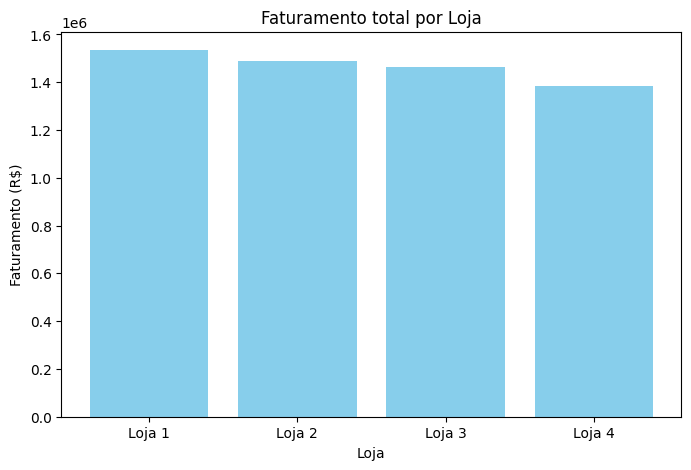

In [ ]:
import matplotlib.pyplot as plt

df_lojas["Preço"] = df_lojas["Preço"].replace('[R$]', '', regex=True).replace(',', '.', regex=True).astype(float)

faturamento = df_lojas.groupby("loja")["Preço"].sum().reset_index()

plt.figure(figsize=(8, 5))
plt.bar(faturamento["loja"], faturamento["Preço"], color="skyblue")
plt.title("Faturamento total por Loja")
plt.xlabel("Loja")
plt.ylabel("Faturamento (R$)")
plt.show()

# 2. Vendas por Categoria


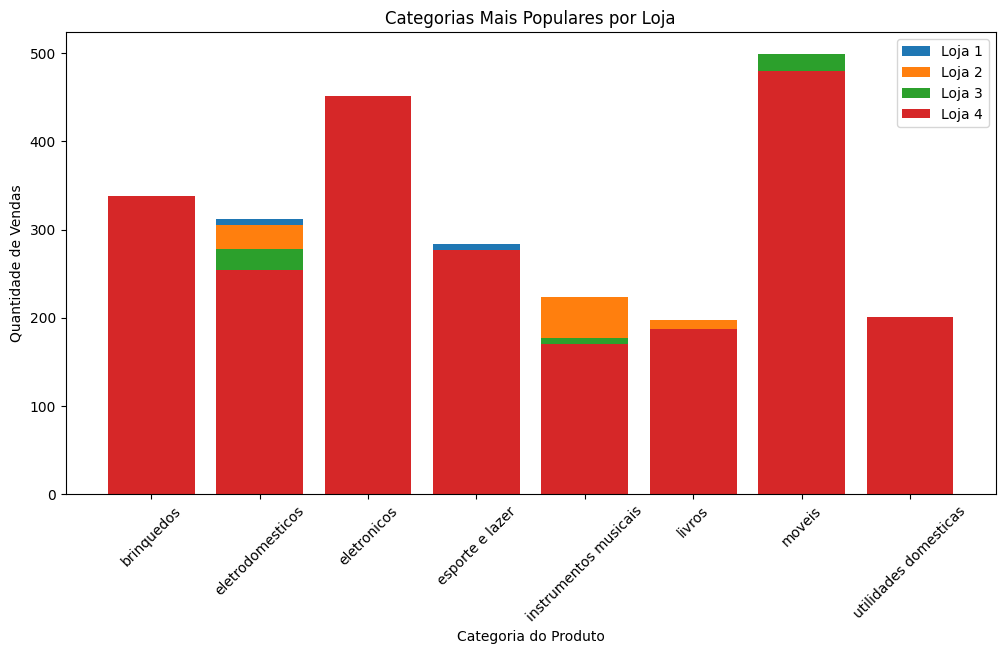

In [ ]:
categorias = df_lojas.dropna(subset=["Categoria do Produto", "Produto"]) \
                     .groupby(["loja", "Categoria do Produto"])["Produto"].count().reset_index()

plt.figure(figsize=(12,6))
for loja_nome in categorias["loja"].unique():
    dados = categorias[categorias["loja"] == loja_nome]
    plt.bar(dados["Categoria do Produto"], dados["Produto"], label=loja_nome)

plt.title("Categorias Mais Populares por Loja")
plt.xlabel("Categoria do Produto")
plt.ylabel("Quantidade de Vendas")
plt.xticks(rotation=45)
plt.legend()
plt.show()

# 3. Média de Avaliação das Lojas

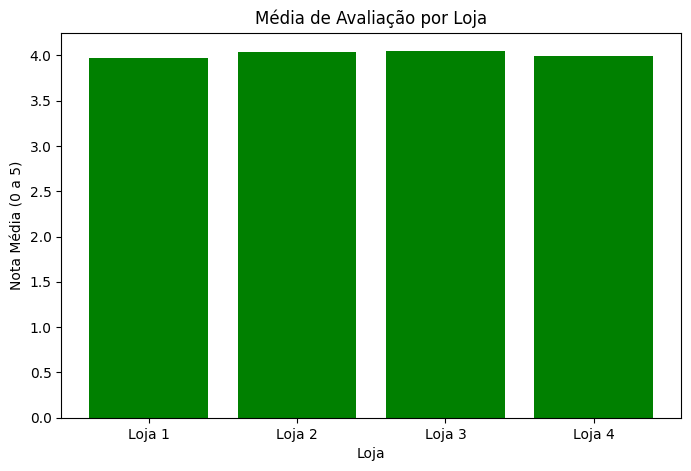

In [ ]:
df_lojas["Avaliação da compra"] = pd.to_numeric(df_lojas["Avaliação da compra"], errors="coerce")

avaliacao = df_lojas.groupby("loja")["Avaliação da compra"].mean().reset_index()

plt.figure(figsize=(8,5))
plt.bar(avaliacao["loja"], avaliacao["Avaliação da compra"], color="green")
plt.title("Média de Avaliação por Loja")
plt.xlabel("Loja")
plt.ylabel("Nota Média (0 a 5)")
plt.show()

# 4. Produtos Mais e Menos Vendidos

In [ ]:
produtos = df_lojas.groupby(["loja","Produto"])["Quantidade de parcelas"].sum().reset_index()

mais_vendidos = produtos.sort_values("Quantidade de parcelas", ascending=False).groupby("loja").head(1)
menos_vendidos = produtos.sort_values("Quantidade de parcelas", ascending=True).groupby("loja").head(1)

print("📈 Produtos mais vendidos por loja:\n", mais_vendidos)
print("\n📉 Produtos menos vendidos por loja:\n", menos_vendidos)

📈 Produtos mais vendidos por loja:
        loja                   Produto  Quantidade de parcelas
79   Loja 2  Iniciando em programação                     223
43   Loja 1        Secadora de roupas                     214
171  Loja 4   Dashboards com Power BI                     196
104  Loja 3                 Bicicleta                     191

📉 Produtos menos vendidos por loja:
        loja         Produto  Quantidade de parcelas
11   Loja 1    Celular ABXY                      78
177  Loja 4   Guarda roupas                      88
87   Loja 2  Mesa de jantar                      89
149  Loja 3   TV Led UHD 4K                      94


# 5. Frete Médio por Loja


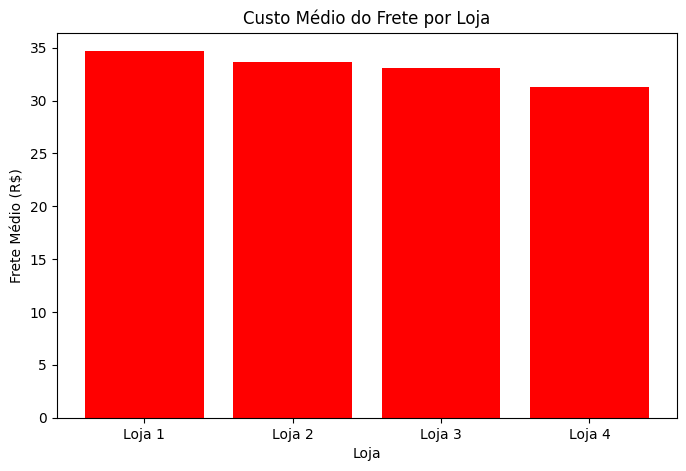

In [ ]:

frete = df_lojas.groupby("loja")["Frete"].mean().reset_index()

plt.figure(figsize=(8,5))
plt.bar(frete["loja"], frete["Frete"], color="red")
plt.title("Custo Médio do Frete por Loja")
plt.xlabel("Loja")
plt.ylabel("Frete Médio (R$)")
plt.show()

In [ ]:
df_lojas = pd.concat([loja, loja2, loja3, loja4], ignore_index=True)


# Relatório consolidado com as métricas principais
relatorio = pd.DataFrame()

# Faturamento total por loja
faturamento = df_lojas.groupby("loja")["Preço"].sum()

# Categoria mais popular (contando produtos vendidos)
categoria_popular = df_lojas.groupby(["loja", "Categoria do Produto"])["Produto"].count().reset_index()
categoria_popular = categoria_popular.loc[categoria_popular.groupby("loja")["Produto"].idxmax()][["loja", "Categoria do Produto"]]

# Média de avaliação
avaliacao_media = df_lojas.groupby("loja")["Avaliação da compra"].mean()

# Produto mais vendido
produto_mais = df_lojas.groupby(["loja", "Produto"])["Produto"].count().reset_index(name="qtd")
produto_mais = produto_mais.loc[produto_mais.groupby("loja")["qtd"].idxmax()][["loja", "Produto"]]

# Produto menos vendido
produto_menos = df_lojas.groupby(["loja", "Produto"])["Produto"].count().reset_index(name="qtd")
produto_menos = produto_menos.loc[produto_menos.groupby("loja")["qtd"].idxmin()][["loja", "Produto"]]

# Custo médio do frete
frete_medio = df_lojas.groupby("loja")["Frete"].mean()

# Juntando tudo em um único DataFrame
relatorio["Faturamento Total"] = faturamento
relatorio["Categoria Mais Popular"] = categoria_popular.set_index("loja")["Categoria do Produto"]
relatorio["Avaliação Média"] = avaliacao_media
relatorio["Produto Mais Vendido"] = produto_mais.set_index("loja")["Produto"]
relatorio["Produto Menos Vendido"] = produto_menos.set_index("loja")["Produto"]
relatorio["Frete Médio"] = frete_medio

# Mostrando o relatório final
relatorio

,Faturamento Total,Categoria Mais Popular,Avaliação Média,Produto Mais Vendido,Produto Menos Vendido,Frete Médio
loja,,,,,,
Loja 1,1534509.12,moveis,3.976685,Guarda roupas,Celular ABXY,34.691805
Loja 2,1488459.06,moveis,4.037304,Iniciando em programação,Jogo de tabuleiro,33.621941
Loja 3,1464025.03,moveis,4.048326,Kit banquetas,Blocos de montar,33.074464
Loja 4,1384497.58,moveis,3.995759,Cama box,Guitarra,31.278997


## Relatório de Análise de Lojas para Decisão de Venda

**Introdução**

Este relatório tem como objetivo analisar o desempenho de quatro lojas, considerando diversos fatores como faturamento, popularidade de categorias, avaliação dos clientes, produtos mais e menos vendidos, e custo do frete. A análise visa fornecer subsídios para a decisão do Senhor João sobre qual loja seria mais vantajosa para ser vendida.

**Análise dos Fatores**

Para a análise, foram considerados os seguintes pontos:

*   **Faturamento Total por Loja:**
    Observando o gráfico de faturamento total por loja, notamos que a **Loja 1** apresenta o maior faturamento, seguida pela Loja 2, Loja 3 e Loja 4. Isso indica que a Loja 1 tem o melhor desempenho em termos de receita bruta.

*   **Categorias Mais Populares por Loja:**
    A análise das categorias mais populares por loja revela que a categoria "**moveis**" é a mais vendida em todas as lojas. Isso sugere uma forte demanda por produtos dessa categoria em todas as unidades. Outras categorias com bom desempenho variam entre as lojas.

*   **Média de Avaliação dos Clientes por Loja:**
    O gráfico de média de avaliação por loja mostra que todas as lojas possuem uma média de avaliação próxima, em torno de 4 em uma escala de 0 a 5. A **Loja 3** apresenta a maior média de avaliação, indicando uma maior satisfação geral dos clientes.

*   **Produtos Mais e Menos Vendidos por Loja:**
    A análise dos produtos mais e menos vendidos por loja fornece insights sobre o desempenho individual dos produtos. O produto mais vendido varia entre as lojas, enquanto os menos vendidos também apresentam diversidade. A **Loja 2** tem como produto mais vendido "Iniciando em programação", enquanto a **Loja 1** tem "Secadora de roupas". Em relação aos menos vendidos, a **Loja 1** tem "Celular ABXY" e a **Loja 4** tem "Guarda roupas".

*   **Frete Médio por Loja:**
    O gráfico do custo médio do frete por loja mostra que a **Loja 4** possui o menor custo médio de frete, enquanto a **Loja 1** apresenta o maior custo médio. O custo do frete é um fator importante a ser considerado, pois impacta nos custos operacionais e na competitividade.

**Relatório Consolidado**

O relatório consolidado gerado anteriormente reúne as métricas principais de cada loja:

| Loja   | Faturamento Total | Categoria Mais Popular | Avaliação Média | Produto Mais Vendido       | Produto Menos Vendido | Frete Médio |
| :----- | :---------------- | :--------------------- | :-------------- | :------------------------- | :-------------------- | :---------- |
| Loja 1 | 1534509.12        | moveis                 | 3.976685        | Guarda roupas              | Celular ABXY          | 34.691805   |
| Loja 2 | 1488459.06        | moveis                 | 4.037304        | Iniciando em programação   | Jogo de tabuleiro     | 33.621941   |
| Loja 3 | 1464025.03        | moveis                 | 4.048326        | Kit banquetas              | Blocos de montar      | 33.074464   |
| Loja 4 | 1384497.58        | moveis                 | 3.995759        | Cama box                   | Guitarra              | 31.278997   |

**Conclusão e Recomendação**

Considerando todos os fatores analisados, a decisão sobre qual loja vender depende da prioridade do Senhor João.

*   Se o foco principal for o **maior faturamento**, a **Loja 1** seria a candidata natural, apesar de ter o maior frete médio e uma avaliação ligeiramente menor que as outras.
*   Se a **satisfação do cliente** e uma boa avaliação forem prioritárias, a **Loja 3** se destaca, embora seu faturamento seja o terceiro maior.
*   A **Loja 4** apresenta o menor faturamento e o menor frete médio.
*   A **Loja 2** tem o segundo maior faturamento e a segunda maior avaliação média.

Analisando o cenário geral, a **Loja 1** demonstra o maior potencial de receita, o que pode ser um fator crucial na decisão de venda. Embora tenha um frete médio mais alto, o faturamento superior pode compensar esse custo, dependendo da margem de lucro dos produtos. A popularidade da categoria "moveis" em todas as lojas também sugere que a Loja 1, com seu alto faturamento, está capitalizando bem essa demanda.

**Recomendação:**

Com base na análise do faturamento, que é um indicador chave de sucesso comercial, a **Loja 1** parece ser a opção mais interessante para o Senhor João vender. No entanto, é fundamental que o Senhor João avalie suas próprias prioridades e a estratégia de venda para tomar a decisão final.